In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [15]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(

    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')

).sort_values(by= 'skill_count', ascending=False).head(11)

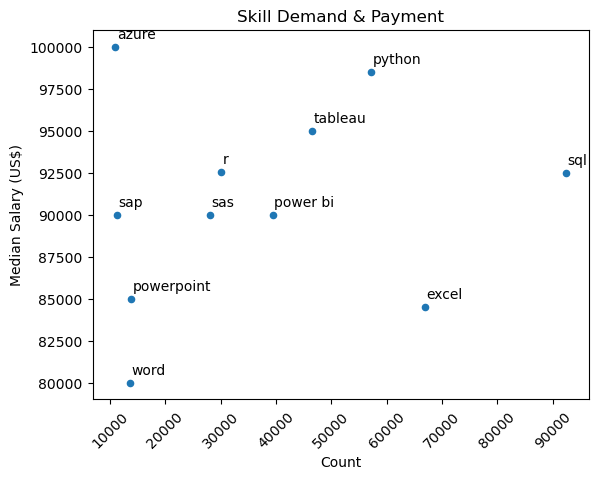

In [26]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Skill Demand & Payment')
plt.xlabel('Count')
plt.ylabel('Median Salary (US$)')
plt.xticks(rotation=45, ha='center')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i]+300, skill_stats['median_salary'].iloc[i]+500, txt)

plt.show()